# Economic and Population Factors on Environmental Health
#### Haci Alkanli,     CS 159,     Fall 2024

## Introduction:
- In this project we are going to have comperative and correlation analysis of the countries regarding the following variables.
    - GDP
    - CO2 emission
    - Safely managed drinking water proportions
    - PM2.5 in air
    - Population Density

## Data come from:

- Concentrations of fine particulate matter (PM2.5)
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/concentrations-of-fine-particulate-matter-(pm2-5)

- Estimates for drinking water, sanitation and hygiene services by country, 2000 to 2020 (Joint Monitoring Programme, JMP)
https://data.who.int/indicators/i/5131A52/1548EA3 


- World, Region, Country GDP/GDP per capita
https://www.kaggle.com/datasets/tmishinev/world-country-gdp-19602021


- World Population Density
https://www.kaggle.com/datasets/varpit94/world-population-density

- CO2 and Greenhouse Gas Emissions by Region
https://www.kaggle.com/datasets/shahriarkabir/co2-and-greenhouse-gas-emissions-by-region

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight') 

ModuleNotFoundError: No module named 'datascience'

## Importing the datasets and rearranging.
We will be using 2019 data for all datasets.

In [3]:
# Population of countries by years and land area are displayed.
path = '/home/jovyan/materials-sp22/mydatasets/'
pop_density_original = Table.read_table(path +'World Population Density.csv')
pop_density_original.show(2)

cca2,name,pop2021,pop2020,pop2050,pop2030,pop2019,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,area,Density,GrowthRate,WorldPercentage,rank
AF,Afghanistan,39835.4,38928.3,64683,48093.6,38041.8,34413.6,29185.5,20780,12412.3,13356.5,11173.6,652230,61.0757,1.0233,0.0051,37
AL,Albania,2872.93,2877.8,2424.06,2786.97,2880.92,2890.51,2948.02,3129.24,3286.07,2682.69,2150.71,28748,99.9351,0.9983,0.0004,140


In [4]:
pop_density_short = pop_density_original.select(1, 6, 13)
density2019 = pop_density_short.column(1) * 1000 / pop_density_short.column(2)
pop_density = Table().with_columns('Country', pop_density_short.column(0),
                                   'pop density', density2019)
pop_density.show(2)

Country,pop density
Afghanistan,58.3257
Albania,100.213


In [5]:
# GDP and GDP per capita of countries by years are displayed.

path = '/home/jovyan/materials-sp22/mydatasets/'
gdp_original = Table.read_table(path +'world_country_gdp_usd.csv')
gdp_short = gdp_original.where('year', 2019)
gdp = gdp_short.select('Country Name', ' GDP_per_capita_USD ')
gdp = gdp.relabeled(' GDP_per_capita_USD ', 'GDP')
gdp = gdp.relabeled('Country Name', 'Country')
gdp = gdp.where('GDP', are.not_equal_to('nan'))
gdp.show(2)

Country,GDP
Afghanistan,494
Africa Eastern and Southern,1511


In [6]:
# Proportion of population using safely managed drinking water by years are displayed.
path = '/home/jovyan/materials-sp22/mydatasets/'
safe_water_original = Table.read_table(path +'safe water.csv')
safe_water_original.show(1)

Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Afghanistan,AFG,People using safely managed drinking water services (% o ...,SH.H2O.SMDW.ZS,11.0933,11.1052,12.0077,12.9099,13.8187,14.7339,15.6484,16.5625,17.476,18.3889,19.3011,20.2129,21.124,22.0345,22.9443,23.8536,24.7622,25.6714,26.5813,27.4917,28.4025,29.3138,30.0341


In [7]:
safe_water_short = safe_water_original.select('Country Name', '2019')
safe_water_short = safe_water_short.where('2019', are.above(0))
safe_water = safe_water_short.relabeled('Country Name', 'Country')
safe_water = safe_water.relabeled('2019', 'safe water prop')
safe_water.show(3)

Country,safe water prop
Afghanistan,27.4917
Africa Western and Central,28.0627
Albania,70.6659


In [8]:
# CO2 Emissions (Mt) are displayed.

path = '/home/jovyan/materials-sp22/mydatasets/'
CO2_emission_original = Table.read_table(path +'co2_greenHouseGas_Emissions.csv')
CO2_emission_original.show(3)

Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
Afghanistan,6,99,Asia
Albania,4,10,Europe
Algeria,177,219,Africa


In [9]:
CO2_emission_short = CO2_emission_original.select('Region', ' CO2 Emissions (Mt) ')
CO2_emission = CO2_emission_short.relabeled('Region', 'Country')
CO2_emission = CO2_emission.relabeled(' CO2 Emissions (Mt) ', 'CO2 emission')
CO2_emission.show(3)

Country,CO2 emission
Afghanistan,6
Albania,4
Algeria,177


In [10]:
# Amount PM2.5 in air are displayed.

path = '/home/jovyan/materials-sp22/mydatasets/'
PM_in_air_original = Table.read_table(path +'Concentrations of fine particulate matter (PM2.5).csv')
PM_in_air_original.show(1)

IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.01,nan,nan,6.29,nan,13.74,10.01 [6.29-13.74],nan,nan,EN,2022-08-12T07:00:00.000Z


In [11]:
PM_in_air_short = PM_in_air_original.where('Period', 2019).where('Dim1', 'Total')
PM_in_air = PM_in_air_short.select('Location', 'FactValueNumeric')
PM_in_air = PM_in_air.relabeled('Location', 'Country').relabeled('FactValueNumeric', 'PM in air')
PM_in_air.show(3)

Country,PM in air
Afghanistan,62.49
Albania,16.28
Algeria,22.68


### Datasets:
- PM_in_air
- CO2_emission
- safe_water
- gdp
- pop_density

#### Now let's bring all columns into one table.

In [12]:
data1 = gdp.join('Country', CO2_emission)
data2 = data1.join('Country', safe_water)
data3 = data2.join('Country', PM_in_air)
data = data3.join('Country', pop_density)
data.show(3)

Country,GDP,CO2 emission,safe water prop,PM in air,pop density
Afghanistan,494,6,27.4917,62.49,58.3257
Albania,5396,4,70.6659,16.28,100.213
Algeria,3990,177,73.9539,22.68,18.0763


## Statistical Summaries of all variables.

In [13]:
def summaries(col):
    return make_array(np.min(data.column(col)), 
                         percentile(25, data.column(col)), 
                         percentile(50, data.column(col)),
                        percentile(75, data.column(col)),
                        np.max(data.column(col)))

GDP_summary = summaries('GDP')
CO2_emission_summary = summaries('CO2 emission')
safe_water_summary = summaries('safe water prop')
PM_in_air_summary = summaries('PM in air')
pop_density_summary = summaries('pop density')

summaries_table = Table().with_columns(
'summaries', make_array('Min', 'Q1', 'Median', 'Q3', 'Max'),
    'GDP', GDP_summary,
    'CO2 emission', CO2_emission_summary,
    'safe water prop', safe_water_summary,
    'PM in air', PM_in_air_summary,
    'pop density', pop_density_summary)

In [14]:
summaries_table

summaries,GDP,CO2 emission,safe water prop,PM in air,pop density
Min,468,0,6.11337,5.47,2.06198
Q1,3235,8,47.5239,10.84,44.0898
Median,6838,36,80.3507,17.29,86.6383
Q3,29206,103,97.6296,26.52,157.226
Max,113219,4850,100,64.08,8175.12


### COMMENT: 
- More than half the world has a GDP per capita less than $10K.  
- More than 25% of the world has a CO2 emission of more than 100 Mt.  
- Almost half of the world has a proportion of 80% or less to access safely managed drinking water.  
- More than half the world has an annual mean of 17 ug/m3 or more concentration of particulate matter of less than 2.5 microns of diameter (PM2.5).

## Distributions of variables with a histogram.

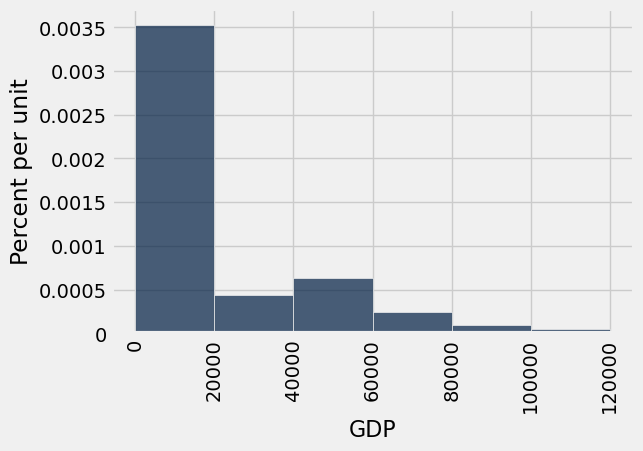

In [46]:
data.hist('GDP', bins = np.arange(0, 120001, 20000))

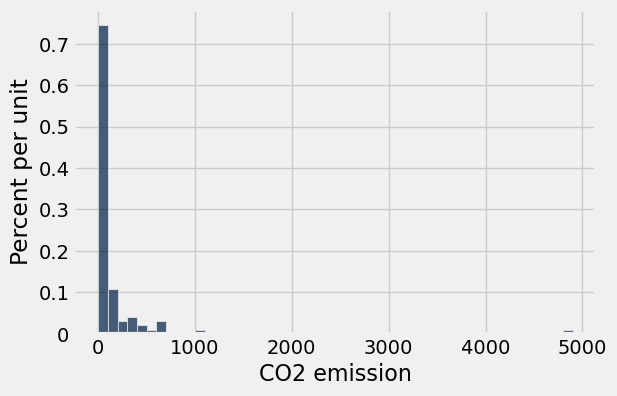

In [16]:
data.hist('CO2 emission', bins = np.arange(0, 5000, 100))

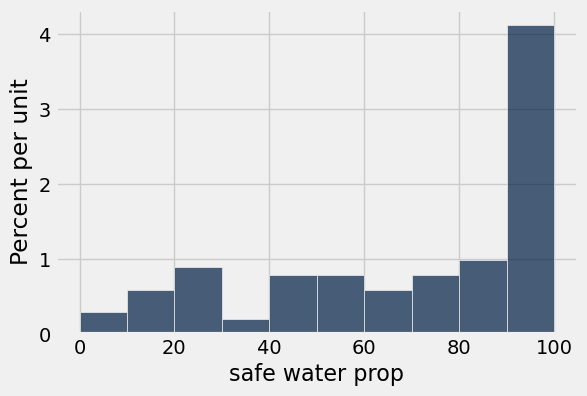

In [17]:
data.hist('safe water prop', bins = np.arange(0, 101, 10))

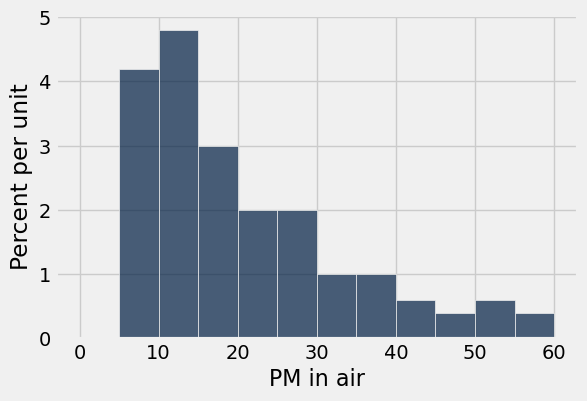

In [18]:
data.hist('PM in air', bins = np.arange(0, 65, 5))

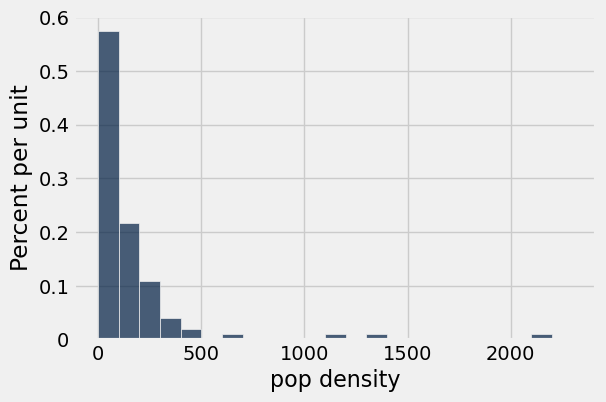

In [19]:
data.hist('pop density', bins = np.arange(0, 2400, 100))

### Top 10 countries with the highest GDP.

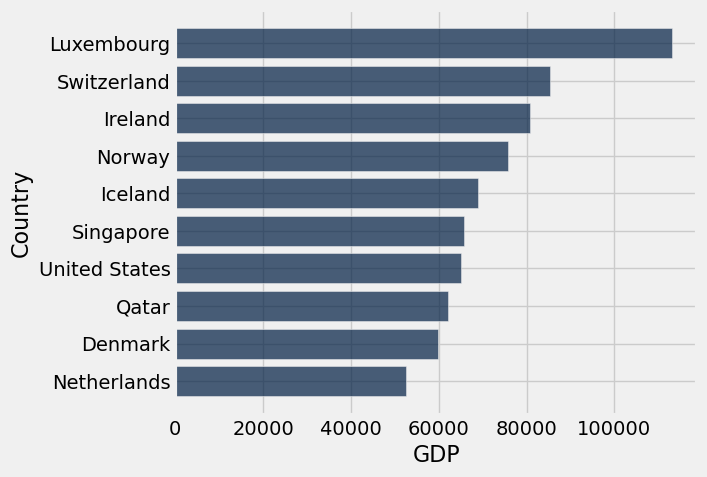

In [20]:
data = data.sort('GDP', descending = True)
data_10 = data.take(np.arange(0,10))
data_10.barh('Country', 'GDP')

### Top 10 countries with the highest CO2 emission.

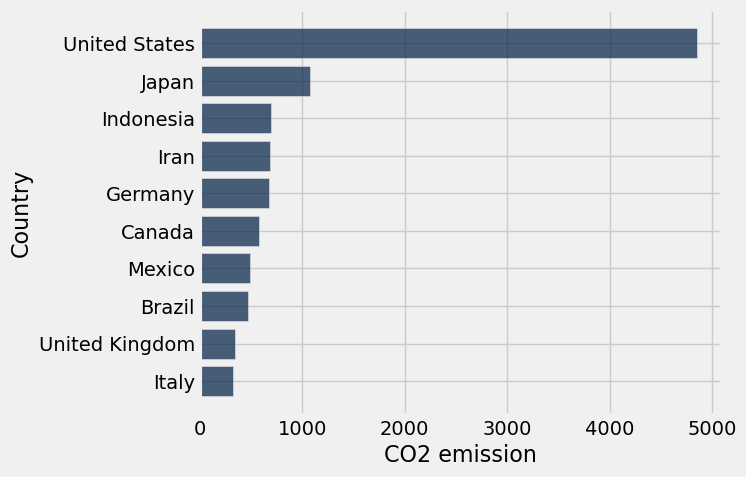

In [21]:
data = data.sort('CO2 emission', descending = True)
data_10 = data.take(np.arange(0,10))
data_10.barh('Country', 'CO2 emission')

### Top 10 countries with the lowest proportion of accessing safely managed drinking water.

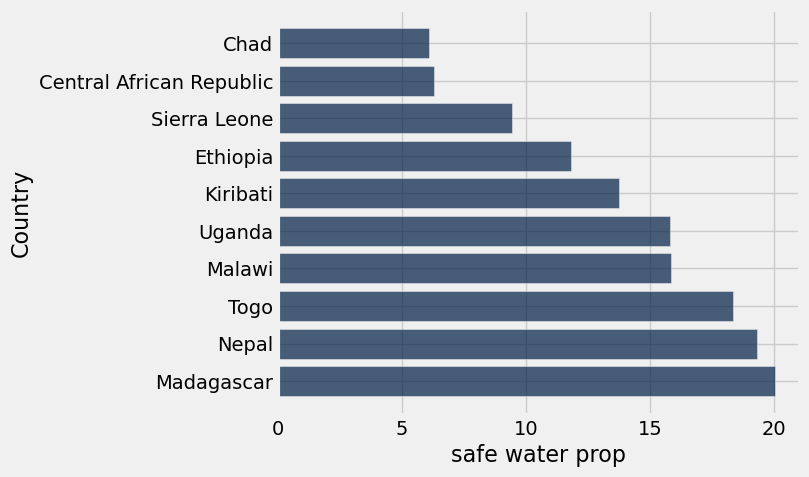

In [22]:
data = data.sort('safe water prop')
data_10 = data.take(np.arange(0,10))
data_10.barh('Country', 'safe water prop')

### Top 10 countries with the highest PM in air.

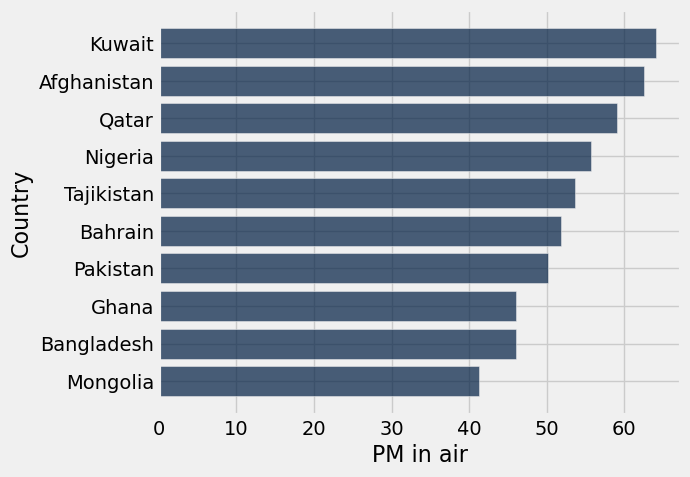

In [23]:
data = data.sort('PM in air', descending = True)
data_10 = data.take(np.arange(0,10))
data_10.barh('Country', 'PM in air')

### Top 10 countries with the highest population density.

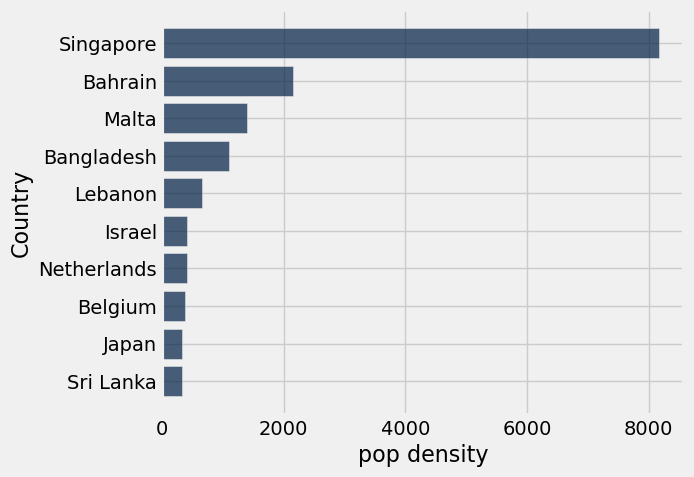

In [24]:
data = data.sort('pop density', descending = True)
data_10 = data.take(np.arange(0,10))
data_10.barh('Country', 'pop density')

In [25]:
data.show(3)

Country,GDP,CO2 emission,safe water prop,PM in air,pop density
Singapore,65831,53,100,13.33,8175.12
Bahrain,23552,38,98.9059,51.82,2145.32
Malta,31186,2,99.8253,12.93,1393.58


### Relationship between GDP and CO2 emission.

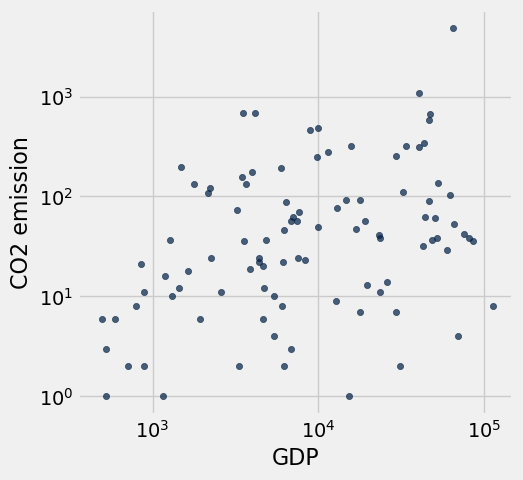

In [26]:
data.scatter('GDP', 'CO2 emission')
plots.xscale('log')
plots.yscale('log')

### COMMENT:  
- It appears that there is no association between GDP and CO2 emission.

### Relationship between GDP and safely managed water proprotions.

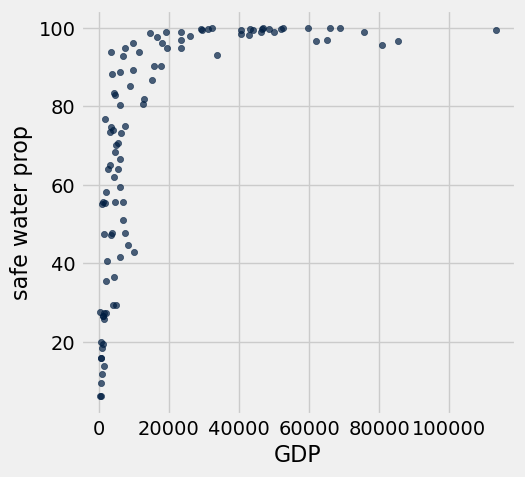

In [27]:
data.scatter('GDP', 'safe water prop')

### COMMENT: 
- It appears that after 20K dollar income, GDP is a not very much associated with the safe water proportions. 
- So, let's consider only the countries with GDP lower than 20K dollars.

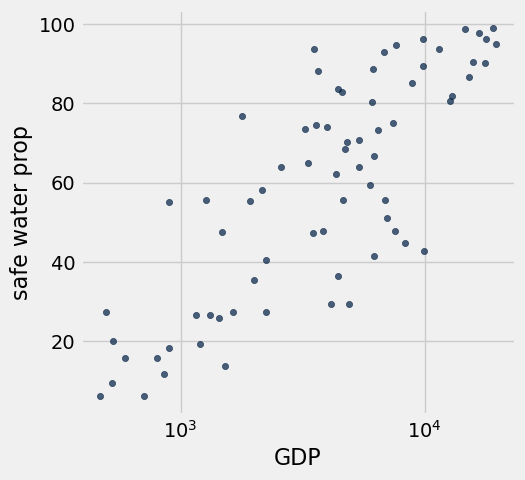

In [28]:
data_gdp_less_than20K = data.where('GDP', are.below(20000))
data_gdp_less_than20K.scatter('GDP', 'safe water prop')
plots.xscale('log')

### COMMENT:
- It looks like there is an association between 'log(GDP)' and 'safe water prop'. 
- So, let's find out correlation coefficient.

In [40]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

x = np.log(data_gdp_less_than20K.column('GDP'))
y = data_gdp_less_than20K.column('safe water prop')
table1 = Table().with_columns('log_gdp', x, 'water', y)
m = slope(table1, 'log_gdp', 'water')
intercept = intercept(table1, 'log_gdp', 'water')
y_p = m * table1.column(0) + intercept
table1 = table1.with_column('water predicted', y_p)
table1.show(5)

log_gdp,water,water predicted
7.67508,58.1802,46.1126
8.92625,47.7,73.8842
8.25531,47.8253,58.9916
8.15622,47.1972,56.7923
7.30115,47.5239,37.8126


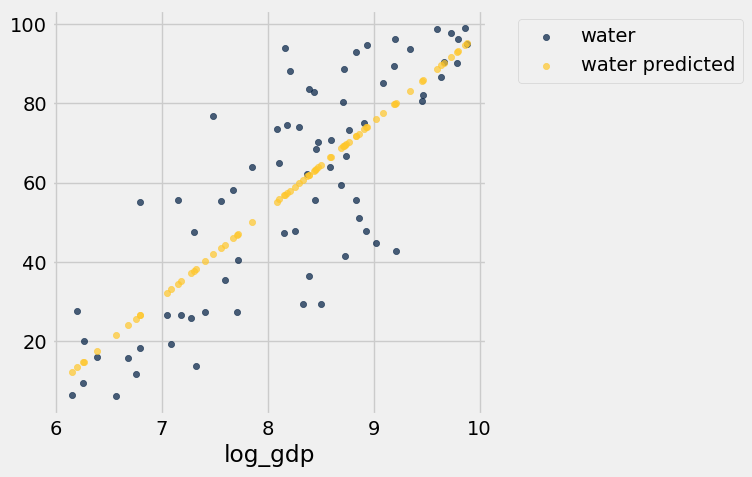

In [37]:
table1.scatter('log_gdp')

In [43]:
print('r = ', correlation(table1, 'log_gdp', 'water'))

r =  0.804607478388


### COMMENT:
- The correlation coefficient is 0.8 which is a strong association between log(GDP) and safely managed drinking water proportions. Remember we considered only the countries with an annual GDP per capita of 20K or less. So, certain level of income really matters in terms of accessing clean water.

### Relationship between _population density_ and _PM2.5_ in air.

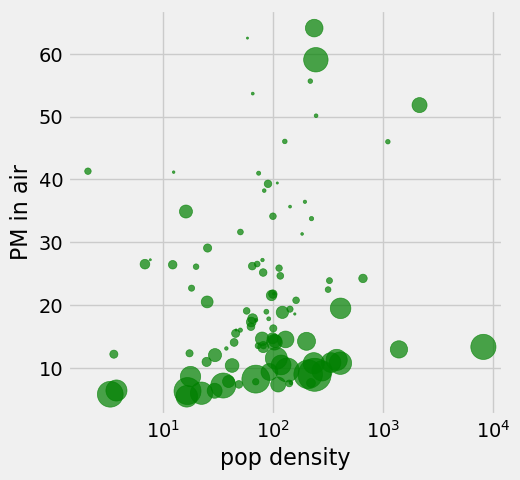

In [31]:
data.scatter('pop density', 'PM in air', s = data.column('GDP')/200, color = 'green')
plots.xscale('log')
plots.show()

### COMMENT: 
- It appears that there is not an association between population density and PM2.5 in air.
- It appears that most of the countries with high GDP have lower PM2.5.